In [35]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [36]:
labels = pd.read_csv("Training_set.csv") # loading the labels
file_paths = [[fname, 'train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = [] # initialize an empty numpy array
image_size = 150 # image size taken is 100 here. one can take other size too
all_image_shape=[]
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
    all_image_shape.append(img_array.shape)
    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append(new_img_array)
data

[array([[188, 188, 188, ..., 176, 175, 175],
        [188, 188, 188, ..., 175, 175, 175],
        [189, 189, 188, ..., 172, 171, 171],
        ...,
        [134, 134, 139, ..., 165, 164, 164],
        [135, 135, 140, ..., 163, 162, 162],
        [135, 135, 140, ..., 163, 162, 162]], dtype=uint8),
 array([[167, 167, 170, ..., 194, 195, 195],
        [167, 168, 170, ..., 194, 195, 195],
        [169, 169, 171, ..., 194, 194, 194],
        ...,
        [183, 184, 186, ..., 197, 196, 195],
        [184, 184, 187, ..., 197, 195, 195],
        [184, 184, 187, ..., 197, 195, 195]], dtype=uint8),
 array([[181, 181, 179, ..., 134, 135, 136],
        [180, 180, 178, ..., 132, 134, 134],
        [178, 177, 176, ..., 126, 126, 126],
        ...,
        [127, 127, 130, ...,  96,  93,  93],
        [128, 128, 131, ...,  95,  92,  92],
        [128, 129, 131, ...,  95,  92,  92]], dtype=uint8),
 array([[ 98,  98,  97, ..., 186, 187, 187],
        [ 98,  98,  98, ..., 186, 187, 187],
        [101, 10

In [37]:
data = np.asarray(data)
data

array([[[188, 188, 188, ..., 176, 175, 175],
        [188, 188, 188, ..., 175, 175, 175],
        [189, 189, 188, ..., 172, 171, 171],
        ...,
        [134, 134, 139, ..., 165, 164, 164],
        [135, 135, 140, ..., 163, 162, 162],
        [135, 135, 140, ..., 163, 162, 162]],

       [[167, 167, 170, ..., 194, 195, 195],
        [167, 168, 170, ..., 194, 195, 195],
        [169, 169, 171, ..., 194, 194, 194],
        ...,
        [183, 184, 186, ..., 197, 196, 195],
        [184, 184, 187, ..., 197, 195, 195],
        [184, 184, 187, ..., 197, 195, 195]],

       [[181, 181, 179, ..., 134, 135, 136],
        [180, 180, 178, ..., 132, 134, 134],
        [178, 177, 176, ..., 126, 126, 126],
        ...,
        [127, 127, 130, ...,  96,  93,  93],
        [128, 128, 131, ...,  95,  92,  92],
        [128, 129, 131, ...,  95,  92,  92]],

       ...,

       [[189, 189, 190, ..., 144, 145, 145],
        [189, 189, 190, ..., 142, 143, 143],
        [189, 190, 190, ..., 134, 135, 136

In [38]:
labels

,filename,label
0,Image_1.jpg,male
1,Image_2.jpg,female
2,Image_3.jpg,female
3,Image_4.jpg,female
4,Image_5.jpg,male
...,...,...
9215,Image_9216.jpg,male
9216,Image_9217.jpg,male
9217,Image_9218.jpg,male
9218,Image_9219.jpg,male


In [39]:
all_image_shape
highestx,highesty=0,0
lowestx,lowesty=1000,1000

for i in all_image_shape:
    if(lowestx>i[0]):
        lowestx=i[0]
    if(lowesty>i[1]):
        lowesty=i[1]
    if(highestx<i[0]):
        highestx=i[0]
    if(highesty<i[1]):
        highesty=i[1]
print(lowestx,highestx,lowesty,highesty) 
# all the data have the bigest shape 113 and smalest shape 41
# for get the best of all data i will use shape 150
    
    

41 113 41 113


In [40]:
new_img_array.shape

(150, 150)

In [41]:
labeltrain=[1 if row['label']=='male' else 0   for idx, row in labels.iterrows()]
labeltrain

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [42]:
data.shape
dataTrain=data.reshape(data.shape[0],150,150,1)
dataTrain


array([[[[188],
         [188],
         [188],
         ...,
         [176],
         [175],
         [175]],

        [[188],
         [188],
         [188],
         ...,
         [175],
         [175],
         [175]],

        [[189],
         [189],
         [188],
         ...,
         [172],
         [171],
         [171]],

        ...,

        [[134],
         [134],
         [139],
         ...,
         [165],
         [164],
         [164]],

        [[135],
         [135],
         [140],
         ...,
         [163],
         [162],
         [162]],

        [[135],
         [135],
         [140],
         ...,
         [163],
         [162],
         [162]]],


       [[[167],
         [167],
         [170],
         ...,
         [194],
         [195],
         [195]],

        [[167],
         [168],
         [170],
         ...,
         [194],
         [195],
         [195]],

        [[169],
         [169],
         [171],
         ...,
         [194],
         [

In [43]:
INPUT_SHAPE = (150, 150,1)

model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               10617088  
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

In [44]:
EPOCHS = 5
# train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(dataTrain, labeltrain,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Train on 8298 samples, validate on 922 samples
Epoch 1/5
8298/8298 [==============================] - 134s 16ms/sample - loss: 3.9052 - acc: 0.6722 - val_loss: 0.5444 - val_acc: 0.7419
Epoch 2/5
8298/8298 [==============================] - 134s 16ms/sample - loss: 0.5060 - acc: 0.7598 - val_loss: 0.4966 - val_acc: 0.7484
Epoch 3/5
8298/8298 [==============================] - 131s 16ms/sample - loss: 0.4706 - acc: 0.7828 - val_loss: 0.5079 - val_acc: 0.7570
Epoch 4/5
8298/8298 [==============================] - 131s 16ms/sample - loss: 0.4063 - acc: 0.8184 - val_loss: 0.5583 - val_acc: 0.7310
Epoch 00004: early stopping


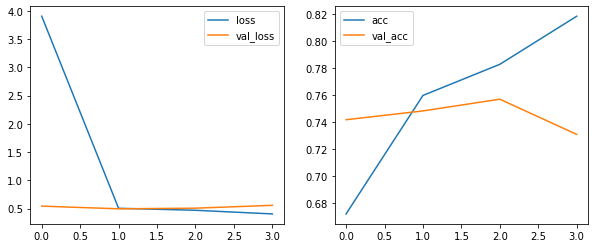

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['acc', 'val_acc']].plot(kind='line', ax=ax[1]);

In [46]:
INPUT_SHAPE = (150, 150,1)

model2 = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(4, 4), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model2.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.3))
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model2.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 147, 147, 16)      272       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 70, 70, 32)        8224      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 39200)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               10035456  
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)              

In [47]:
EPOCHS = 5
# train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history2 = model2.fit(dataTrain, labeltrain,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Train on 8298 samples, validate on 922 samples
Epoch 1/5
8298/8298 [==============================] - 164s 20ms/sample - loss: 7.2050 - acc: 0.5750 - val_loss: 0.6741 - val_acc: 0.5803
Epoch 2/5
8298/8298 [==============================] - 185s 22ms/sample - loss: 0.6487 - acc: 0.6268 - val_loss: 0.6387 - val_acc: 0.6258
Epoch 3/5
8298/8298 [==============================] - 162s 20ms/sample - loss: 0.5959 - acc: 0.6882 - val_loss: 0.6102 - val_acc: 0.6876
Epoch 4/5
8298/8298 [==============================] - 156s 19ms/sample - loss: 0.5431 - acc: 0.7275 - val_loss: 0.5875 - val_acc: 0.6963
Epoch 5/5
8298/8298 [==============================] - 162s 20ms/sample - loss: 0.4950 - acc: 0.7601 - val_loss: 0.5958 - val_acc: 0.6985


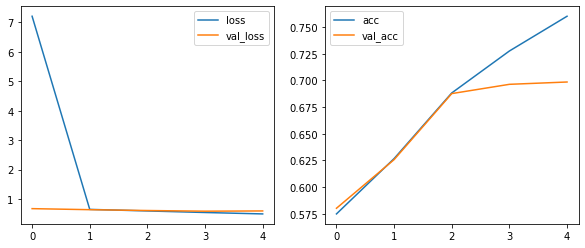

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history2.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['acc', 'val_acc']].plot(kind='line', ax=ax[1]);

In [49]:
INPUT_SHAPE = (150, 150,1)

model3 = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
# activation='relu', padding='valid', input_shape=INPUT_SHAPE))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model3.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model3.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               22429952  
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)              

In [50]:
EPOCHS = 5
# train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history3 = model3.fit(dataTrain, labeltrain,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Train on 8298 samples, validate on 922 samples
Epoch 1/5
8298/8298 [==============================] - 106s 13ms/sample - loss: 80.4235 - acc: 0.5428 - val_loss: 0.6888 - val_acc: 0.5499
Epoch 2/5
8298/8298 [==============================] - 108s 13ms/sample - loss: 0.7582 - acc: 0.5488 - val_loss: 0.6889 - val_acc: 0.5499
Epoch 3/5
8298/8298 [==============================] - 107s 13ms/sample - loss: 0.6890 - acc: 0.5499 - val_loss: 0.6890 - val_acc: 0.5477
Epoch 00003: early stopping


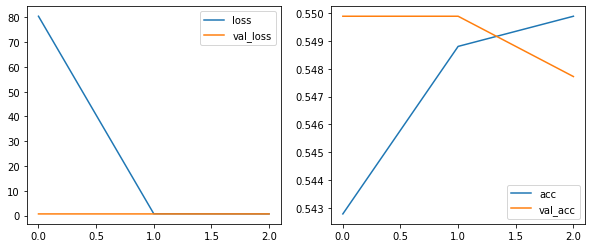

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history3.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['acc', 'val_acc']].plot(kind='line', ax=ax[1]);

In [52]:
INPUT_SHAPE = (150, 150,1)

model4 = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model4.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model4.add(tf.keras.layers.Dense(256, activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.3))
model4.add(tf.keras.layers.Dense(256, activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model4.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               10617088  
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)              

In [53]:
EPOCHS = 5
# train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history4 = model4.fit(dataTrain, labeltrain,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Train on 8298 samples, validate on 922 samples
Epoch 1/5
8298/8298 [==============================] - 132s 16ms/sample - loss: 7.4601 - acc: 0.6262 - val_loss: 0.5742 - val_acc: 0.7245
Epoch 2/5
8298/8298 [==============================] - 130s 16ms/sample - loss: 0.6027 - acc: 0.6946 - val_loss: 0.6593 - val_acc: 0.6128
Epoch 3/5
8298/8298 [==============================] - 134s 16ms/sample - loss: 0.5576 - acc: 0.7160 - val_loss: 0.6041 - val_acc: 0.6822
Epoch 00003: early stopping


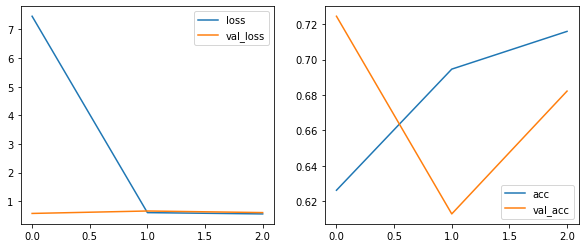

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history4.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['acc', 'val_acc']].plot(kind='line', ax=ax[1]);

In [55]:
INPUT_SHAPE = (150, 150,1)

model5 = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model5.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model5.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.3))
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.3))
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model5.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               10617088  
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)              

In [56]:
EPOCHS = 5
# train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history5 = model5.fit(dataTrain, labeltrain,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Train on 8298 samples, validate on 922 samples
Epoch 1/5
8298/8298 [==============================] - 135s 16ms/sample - loss: 5.7950 - acc: 0.6204 - val_loss: 0.6052 - val_acc: 0.6551
Epoch 2/5
8298/8298 [==============================] - 132s 16ms/sample - loss: 0.5564 - acc: 0.7293 - val_loss: 0.5133 - val_acc: 0.7527
Epoch 3/5
8298/8298 [==============================] - 131s 16ms/sample - loss: 0.5724 - acc: 0.7086 - val_loss: 0.6144 - val_acc: 0.6746
Epoch 4/5
8298/8298 [==============================] - 132s 16ms/sample - loss: 0.5805 - acc: 0.7046 - val_loss: 0.6145 - val_acc: 0.7028
Epoch 00004: early stopping


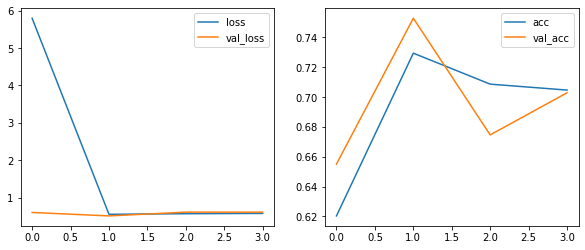

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history5.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['acc', 'val_acc']].plot(kind='line', ax=ax[1]);

In [66]:
INPUT_SHAPE = (150, 150,1)

model5 = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model5.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model5.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model5.add(tf.keras.layers.Dense(256, activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model5.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile model
model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 16)      160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               10617088  
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)             

In [58]:
labels = pd.read_csv("Testing_set.csv") # loading the labels
file_paths = [[fname, 'test/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = [] # initialize an empty numpy array
image_size = 150 # image size taken is 100 here. one can take other size too
all_image_shape=[]
for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
    all_image_shape.append(img_array.shape)
    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append(new_img_array)
data

[array([[140, 140, 141, ..., 171, 172, 173],
        [139, 140, 140, ..., 170, 172, 172],
        [138, 138, 137, ..., 167, 169, 169],
        ...,
        [146, 148, 152, ..., 148, 148, 147],
        [147, 148, 153, ..., 146, 144, 144],
        [147, 148, 153, ..., 145, 143, 143]], dtype=uint8),
 array([[165, 165, 169, ...,  89,  87,  87],
        [164, 165, 168, ...,  89,  87,  87],
        [159, 159, 163, ...,  85,  83,  83],
        ...,
        [111, 111, 113, ..., 122, 121, 120],
        [110, 110, 112, ..., 124, 122, 122],
        [110, 110, 112, ..., 124, 122, 122]], dtype=uint8),
 array([[208, 208, 206, ..., 186, 187, 187],
        [208, 208, 206, ..., 186, 187, 187],
        [207, 207, 206, ..., 183, 184, 184],
        ...,
        [210, 210, 212, ..., 222, 222, 222],
        [210, 210, 212, ..., 221, 221, 221],
        [210, 210, 212, ..., 221, 221, 221]], dtype=uint8),
 array([[ 45,  44,  43, ..., 181, 178, 177],
        [ 42,  42,  40, ..., 180, 178, 177],
        [ 32,  3

In [59]:
data = np.asarray(data)
dataTest=data.reshape(data.shape[0],150,150,1)
dataTest

array([[[[140],
         [140],
         [141],
         ...,
         [171],
         [172],
         [173]],

        [[139],
         [140],
         [140],
         ...,
         [170],
         [172],
         [172]],

        [[138],
         [138],
         [137],
         ...,
         [167],
         [169],
         [169]],

        ...,

        [[146],
         [148],
         [152],
         ...,
         [148],
         [148],
         [147]],

        [[147],
         [148],
         [153],
         ...,
         [146],
         [144],
         [144]],

        [[147],
         [148],
         [153],
         ...,
         [145],
         [143],
         [143]]],


       [[[165],
         [165],
         [169],
         ...,
         [ 89],
         [ 87],
         [ 87]],

        [[164],
         [165],
         [168],
         ...,
         [ 89],
         [ 87],
         [ 87]],

        [[159],
         [159],
         [163],
         ...,
         [ 85],
         [

the best model are model so I will use this models


In [60]:
EPOCHS = 100
# train_images_scaled = train_images_gr / 255.
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, 
                                               restore_best_weights=True,
                                               verbose=1)

history = model.fit(dataTrain, labeltrain,
                    batch_size=32,
                    callbacks=[es_callback], 
                    validation_split=0.1, epochs=EPOCHS,
                    verbose=1)

Train on 8298 samples, validate on 922 samples
Epoch 1/100
8298/8298 [==============================] - 144s 17ms/sample - loss: 0.4050 - acc: 0.8192 - val_loss: 0.6205 - val_acc: 0.6746
Epoch 2/100
8298/8298 [==============================] - 143s 17ms/sample - loss: 0.4230 - acc: 0.8043 - val_loss: 0.4938 - val_acc: 0.8059
Epoch 3/100
8298/8298 [==============================] - 145s 18ms/sample - loss: 0.3073 - acc: 0.8700 - val_loss: 0.4321 - val_acc: 0.8275
Epoch 4/100
8298/8298 [==============================] - 137s 16ms/sample - loss: 0.4405 - acc: 0.8008 - val_loss: 0.5779 - val_acc: 0.7657
Epoch 5/100
8298/8298 [==============================] - 142s 17ms/sample - loss: 0.3479 - acc: 0.8501 - val_loss: 0.4877 - val_acc: 0.7983
Epoch 00005: early stopping


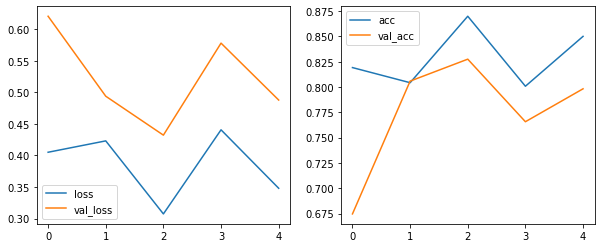

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['acc', 'val_acc']].plot(kind='line', ax=ax[1]);

In [62]:
predictions = model.predict(dataTest)
predictions[:5]

array([[0.02080538, 0.9791947 ],
       [0.6157591 , 0.38424087],
       [0.3188913 , 0.68110865],
       [0.15563019, 0.8443698 ],
       [0.11447396, 0.88552606]], dtype=float32)

In [63]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [64]:
predictionstr = []

for i in prediction_labels:
    if(i==1):
        predictionstr.append('male')
    else:
        predictionstr.append('female')

predictionstr

['male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'fem

In [65]:
res = pd.DataFrame({'label': predictionstr}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.